In [1]:
# import import_ipynb
# from utils import df_from_csv, df_pm25_to_df_aqi, plot_hist, plot_boxes, plot_lines, df_to_csv

# with the new api
from importnb import imports
with imports("ipynb"):
    from utils import df_from_csv, df_pm25_to_df_aqi, plot_hist, plot_boxes, plot_lines, df_to_csv

PM2.5: 35.9, AQI: 102
PM2.5: 35.9, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 35.5, Max: 55.4
AQI: 102, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 101, Max: 150


## PM2.5 to AQI

In [2]:
# Load Raw Data
df_pm25_clean = df_from_csv("pm25_clean.csv", datafolder="1_clean")

# Check Data Types
print(df_pm25_clean.dtypes)

df_pm25_clean.head()

TANGARA_260A    float64
TANGARA_4B1A    float64
TANGARA_14D6    float64
TANGARA_2B42    float64
TANGARA_2E9A    float64
TANGARA_2FF6    float64
TANGARA_307A    float64
TANGARA_48C6    float64
TANGARA_F1AE    float64
TANGARA_06BE    float64
TANGARA_2BBA    float64
dtype: object


,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_48C6,TANGARA_F1AE,TANGARA_06BE,TANGARA_2BBA
DATETIME,,,,,,,,,,,
2023-11-04 00:00:30-05:00,3.0,8.0,4.0,4.0,1.0,2.0,4.0,1.0,4.0,7.0,NaN
2023-11-04 00:01:00-05:00,2.0,7.0,4.0,4.0,1.0,4.0,3.0,1.0,4.0,5.0,NaN
2023-11-04 00:01:30-05:00,2.0,6.0,4.0,4.0,5.0,3.0,3.0,3.0,4.0,5.0,NaN
2023-11-04 00:02:00-05:00,3.0,7.0,5.0,4.0,1.0,3.0,3.0,4.0,3.0,5.0,NaN
2023-11-04 00:02:30-05:00,2.0,7.0,4.0,4.0,1.0,3.0,3.0,2.0,3.0,5.0,NaN


## Descriptive Statistics

In [3]:
# Describe Data
df_pm25_clean.describe()

,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_48C6,TANGARA_F1AE,TANGARA_06BE,TANGARA_2BBA
count,2685.000000,2463.000000,2644.000000,2634.000000,2488.000000,2611.000000,2064.000000,2488.000000,2686.000000,2667.000000,565.0
mean,8.236127,8.000406,10.085855,5.787016,4.333199,5.696668,6.247578,5.860531,7.999628,7.963255,0.0
std,4.486953,3.346312,5.030648,4.823962,3.660545,3.243842,3.693445,4.003447,3.754823,4.357797,0.0
min,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.0
25%,5.000000,6.000000,6.000000,2.000000,2.000000,3.000000,3.000000,3.000000,5.000000,4.000000,0.0
50%,7.000000,7.000000,9.000000,4.000000,3.000000,5.000000,6.000000,5.000000,7.000000,7.000000,0.0
75%,11.000000,10.000000,14.000000,9.000000,6.000000,8.000000,9.000000,8.000000,11.000000,11.000000,0.0
max,20.000000,18.000000,25.000000,19.000000,14.000000,15.000000,18.000000,18.000000,20.000000,21.000000,0.0


## PM2.5 to AQI

In [4]:
# AQI DataFrame Sensors
df_aqi = df_pm25_to_df_aqi(df_pm25_clean)
df_aqi = df_aqi.astype('float')
df_aqi.head()

,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_48C6,TANGARA_F1AE,TANGARA_06BE,TANGARA_2BBA
DATETIME,,,,,,,,,,,
2023-11-04 00:00:30-05:00,13.0,34.0,17.0,17.0,5.0,9.0,17.0,5.0,17.0,30.0,NaN
2023-11-04 00:01:00-05:00,9.0,30.0,17.0,17.0,5.0,17.0,13.0,5.0,17.0,21.0,NaN
2023-11-04 00:01:30-05:00,9.0,25.0,17.0,17.0,21.0,13.0,13.0,13.0,17.0,21.0,NaN
2023-11-04 00:02:00-05:00,13.0,30.0,21.0,17.0,5.0,13.0,13.0,17.0,13.0,21.0,NaN
2023-11-04 00:02:30-05:00,9.0,30.0,17.0,17.0,5.0,13.0,13.0,9.0,13.0,21.0,NaN


## Describe Statistics

In [5]:
# Describe Data
df_aqi.describe()

,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_48C6,TANGARA_F1AE,TANGARA_06BE,TANGARA_2BBA
count,2685.000000,2463.000000,2644.000000,2634.000000,2488.000000,2611.000000,2064.000000,2488.000000,2686.000000,2667.000000,565.0
mean,33.426443,33.145351,39.956505,23.796507,18.424035,24.117962,26.149709,24.453376,33.013775,32.506562,0.0
std,16.267564,12.724985,17.233875,18.272247,14.708174,13.285253,14.551141,15.698258,14.147592,16.071444,0.0
min,5.000000,9.000000,9.000000,0.000000,0.000000,5.000000,5.000000,0.000000,9.000000,9.000000,0.0
25%,21.000000,25.000000,25.000000,9.000000,9.000000,13.000000,13.000000,13.000000,21.000000,17.000000,0.0
50%,30.000000,30.000000,38.000000,17.000000,13.000000,21.000000,25.000000,21.000000,30.000000,30.000000,0.0
75%,46.000000,42.000000,55.000000,38.000000,25.000000,34.000000,38.000000,34.000000,46.000000,46.000000,0.0
max,68.000000,64.000000,79.000000,66.000000,55.000000,58.000000,64.000000,64.000000,68.000000,70.000000,0.0


## Histograms

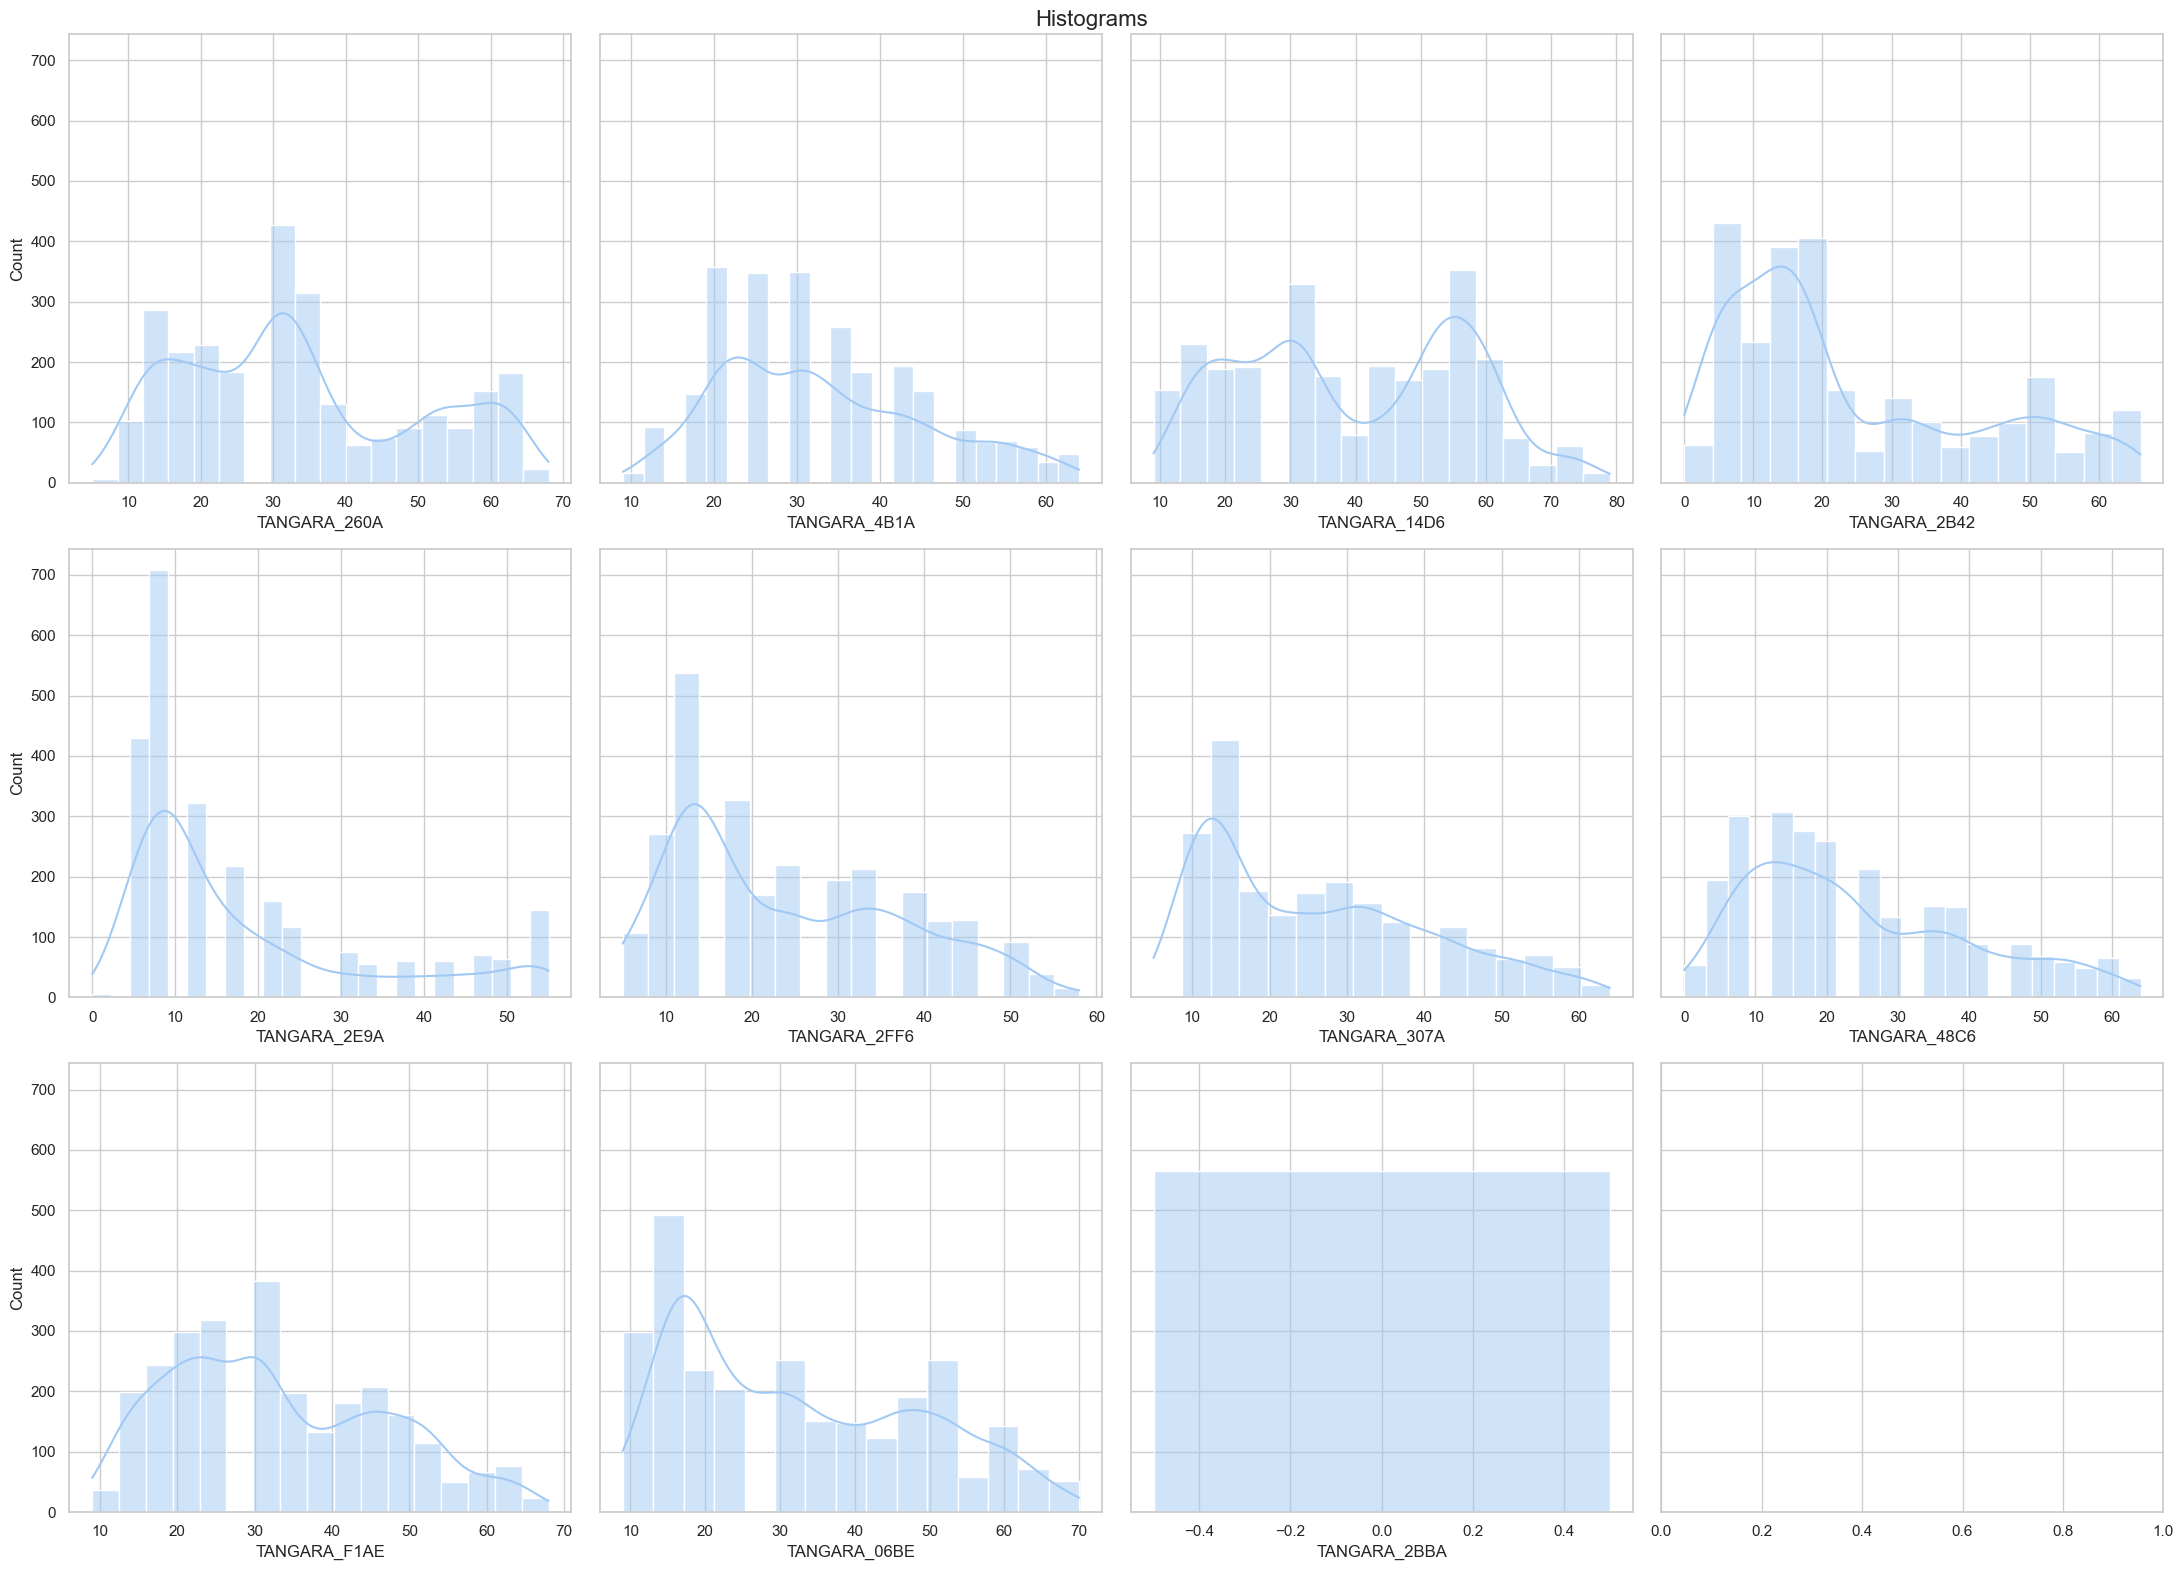

In [6]:
# Plot Histograms
plot_hist(df_aqi)

## Boxplots

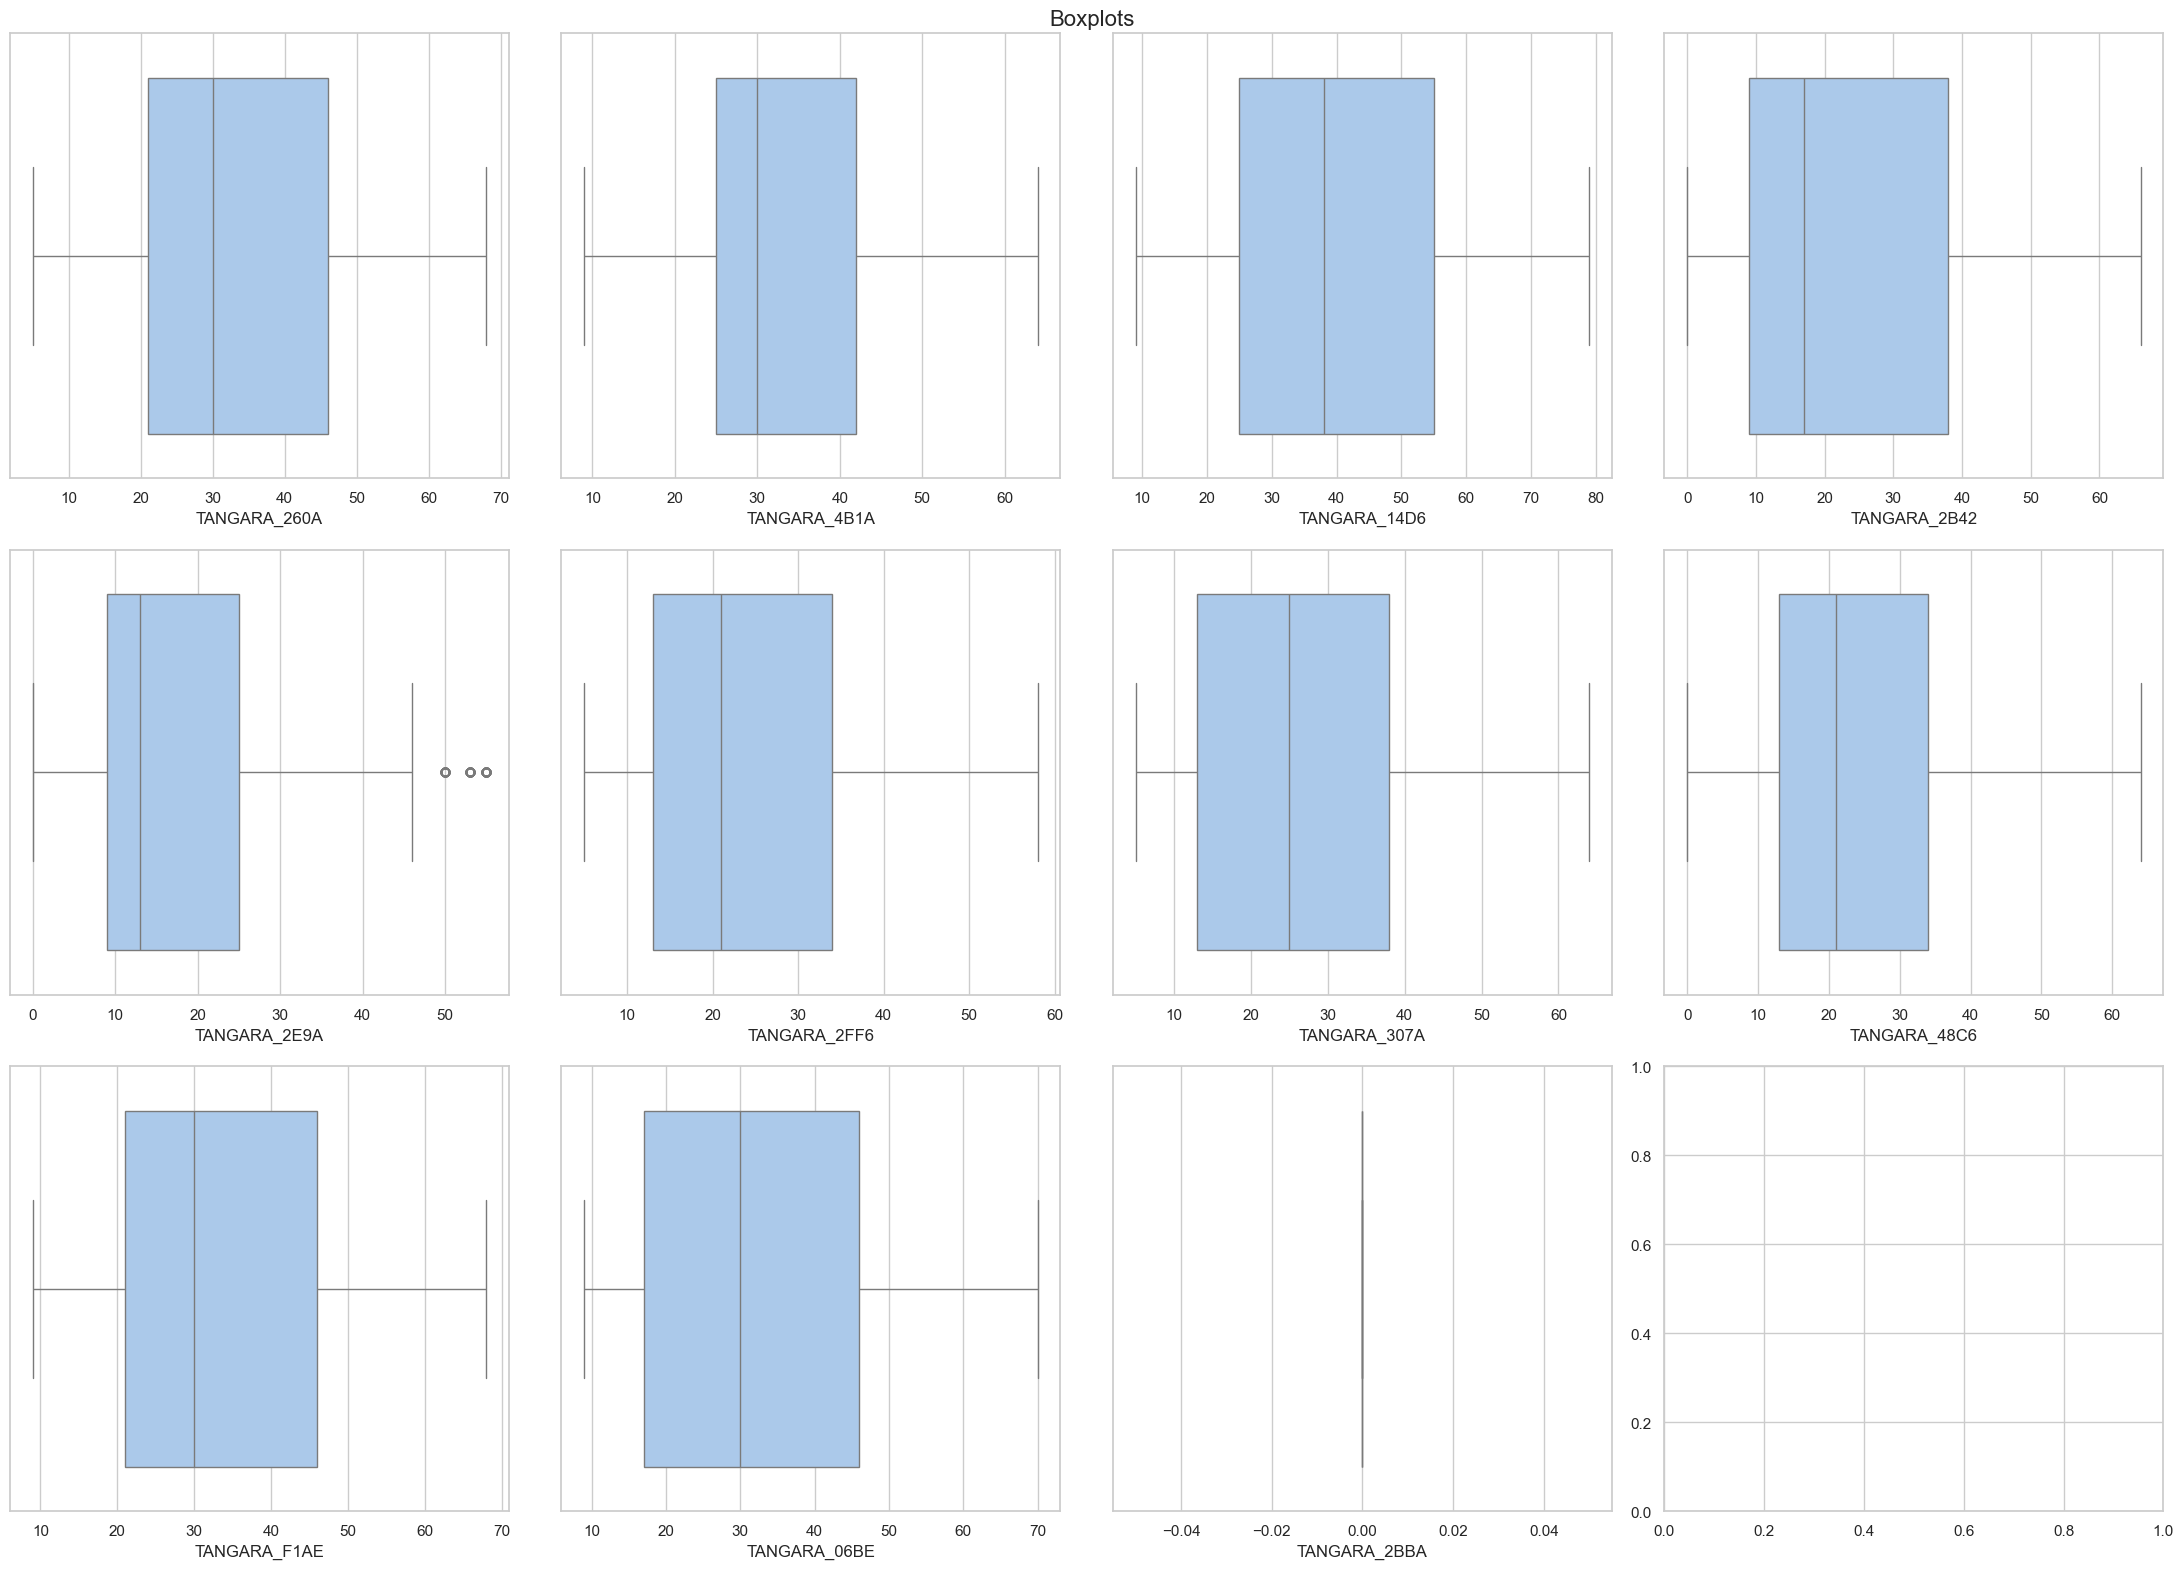

In [7]:
# Plot Boxplots
plot_boxes(df_aqi)

## Lineplots

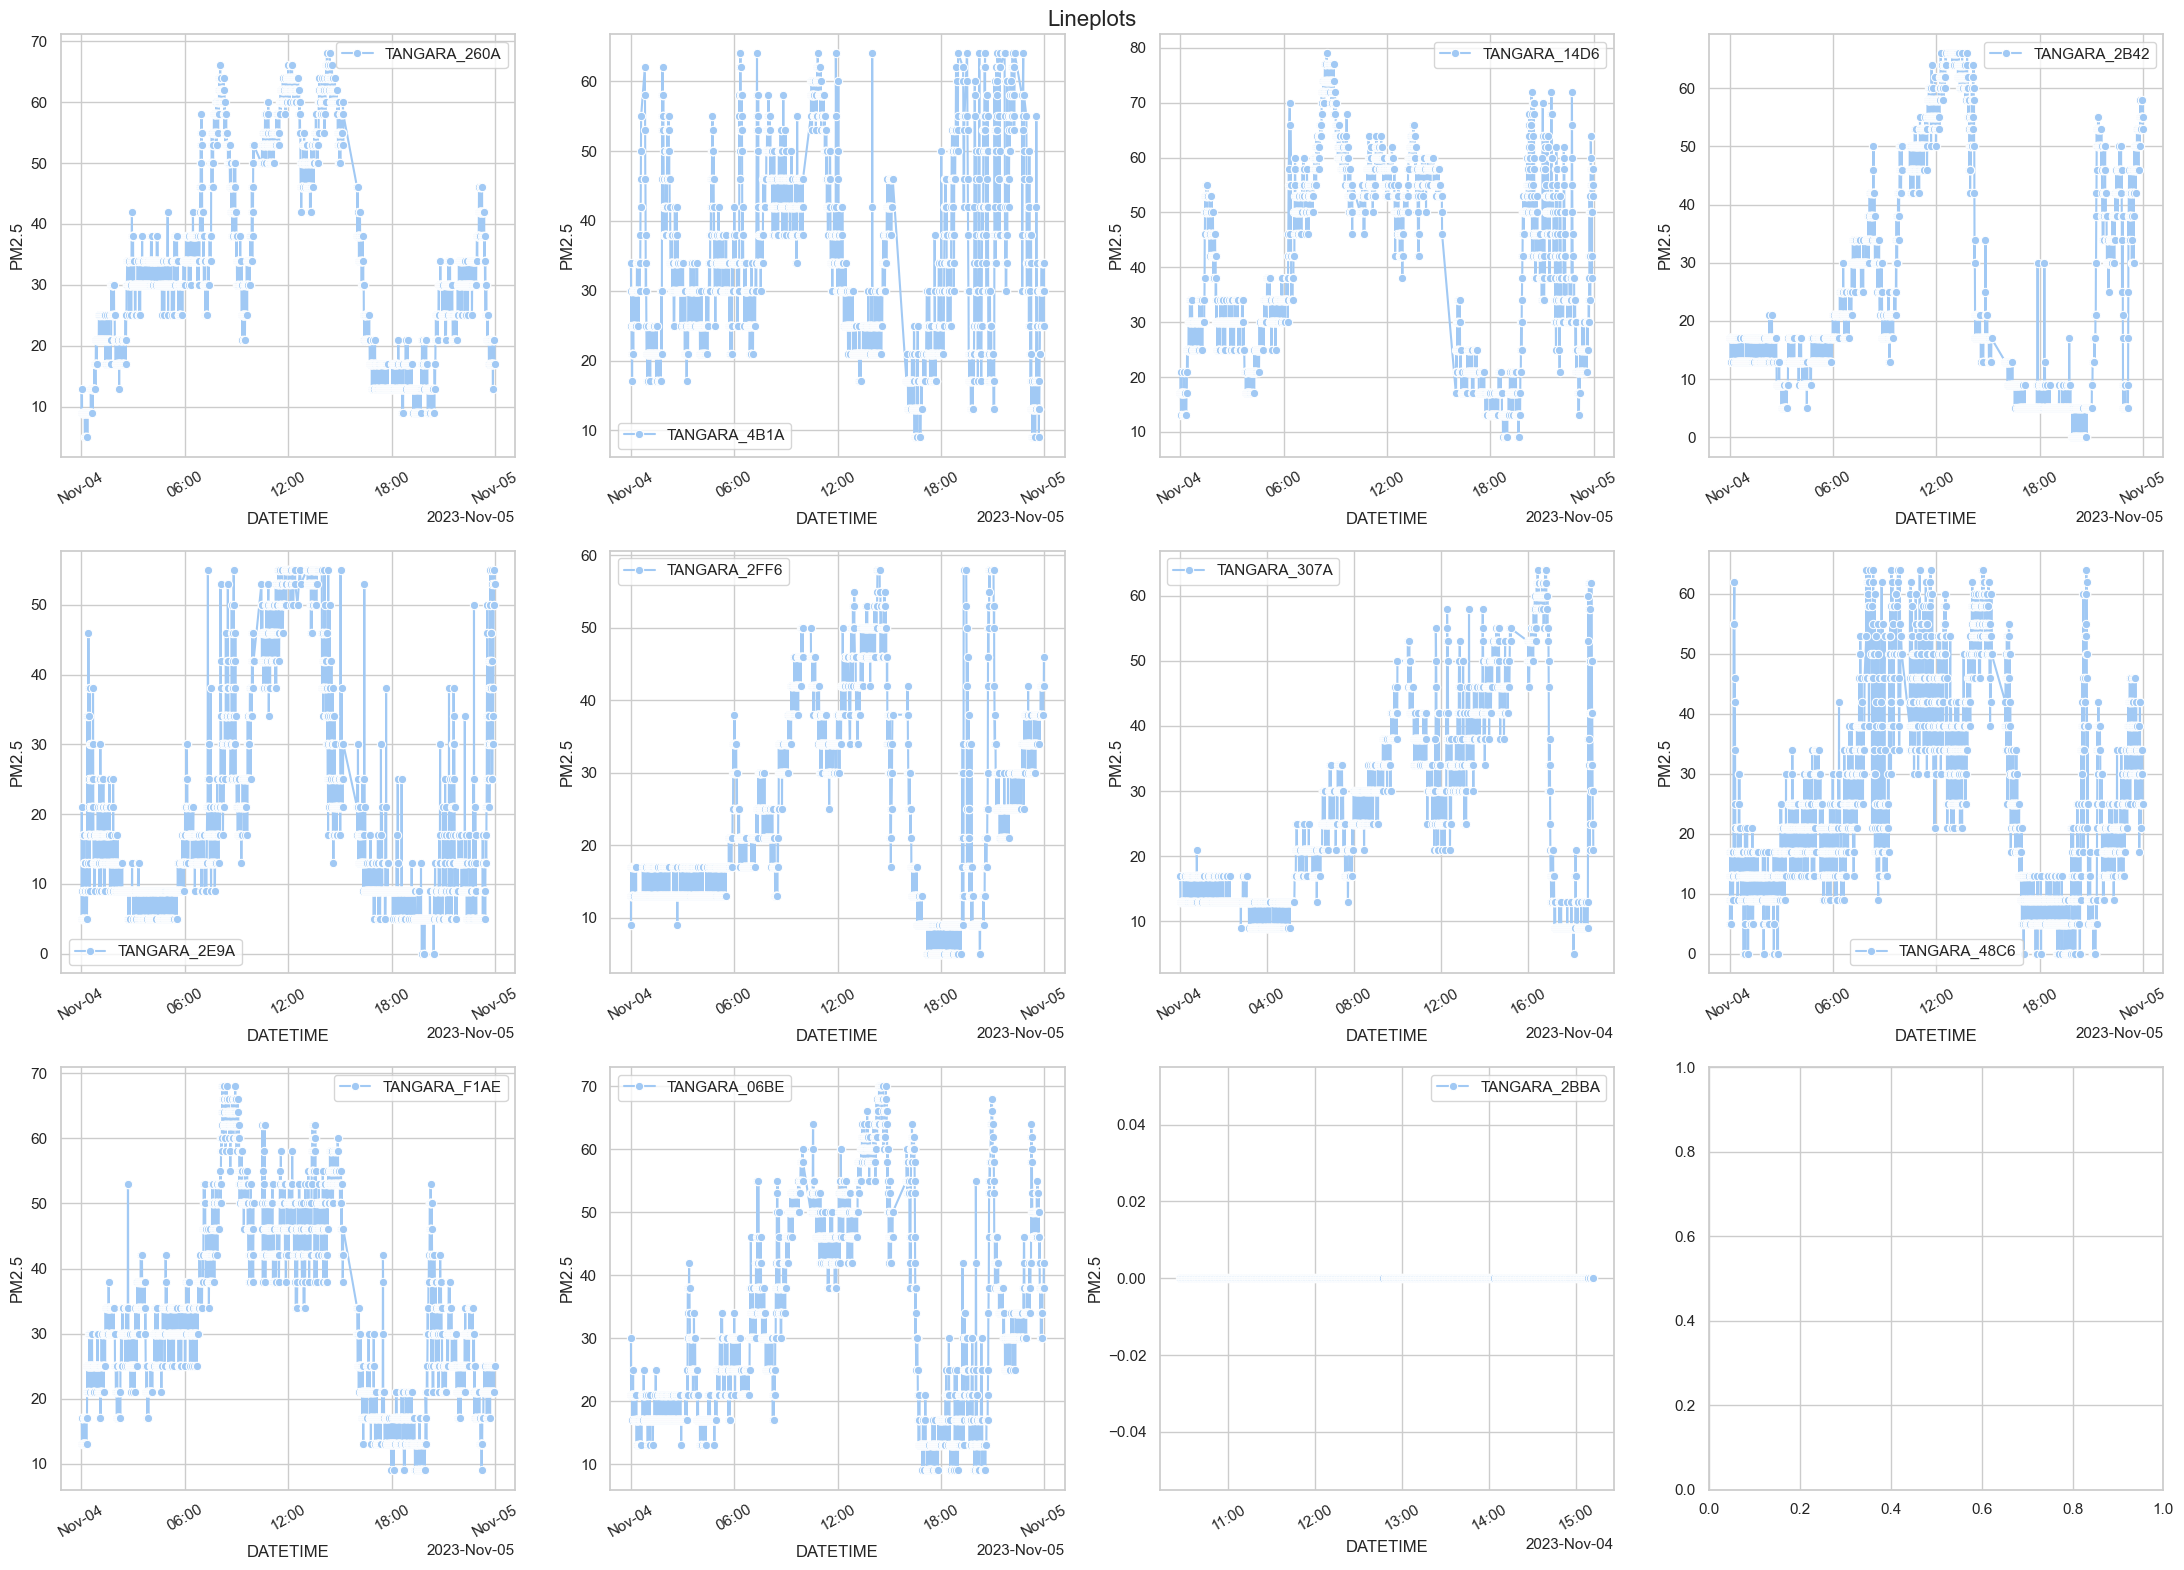

In [8]:
# Plot Lineplots
plot_lines(df_aqi)

In [9]:
# Save AQI Data Frame Sensors into CSV file
df_to_csv(df_aqi, "aqi.csv", datafolder='1_clean')